# Project :Employee Performance Analysis (INX Future Inc.) 

# Data Processing
- Import Libraries
- Import dataset
- Handling Missing Values
- Handling Outliers
- Categorical Encoding
- Feature Selection
   - Correlation Coefficient
     - Correlation between independent and dependant variables
     - Correlation between independent variables
   - Mutual Information Gain Method
   - PCA
- Summary

## Importing Libraries

In [28]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


## Importing Dataset 

In [29]:
# Raw data provided by INX Future Inc., in excel format. 
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls') 

In [30]:
# Viewing Dataframe 
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [31]:
# check rows and coulmns
df.shape

(1200, 28)

- There are 1200 rows and 28 columns in Raw Dataset.

In [32]:
# Getting Insights
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [33]:
# Getting Insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [34]:
# Checking for Categorical variables
objList = df.select_dtypes(include = "object").columns
print('Categorical Variables:', len(objList),'columns')
print()
print(objList)

Categorical Variables: 9 columns

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')


## Handling Missing values

In [35]:
# Check missing values in dataset 
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

- There are no missing values in the Dataset

## Handling Outliers:
Outliers are an extreme value that deviates from the other observations in the dataset. Sometimes outliers play some major role in prediction depending on the use case. 

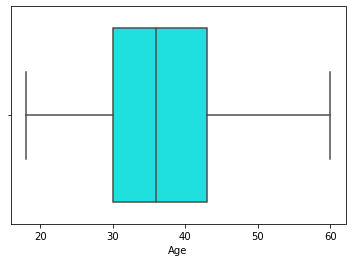

In [36]:
# Check Outlier for Age
sns.boxplot(df.Age,color="cyan")
plt.show()

## There are no Outliers in Age Variable

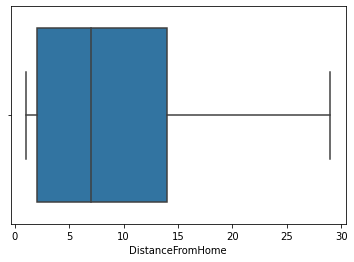

In [37]:
# Check Outliers in DistanceFromHome
sns.boxplot(df.DistanceFromHome)
plt.show()

## There are no Outliers present in this variable

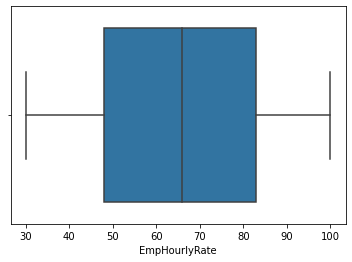

In [38]:
# Check Outliers in EmpHourlyRate
sns.boxplot(df.EmpHourlyRate)
plt.show()

## There are no outliers present in this variable

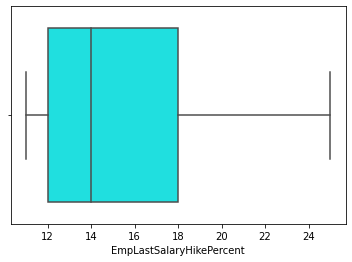

In [41]:
# Check Outliers in EmpLastSalaryHikePercent
sns.boxplot(df.EmpLastSalaryHikePercent,color="cyan")
plt.show()

### There are no outliers in EmpLastSalaryHikePercent

In [42]:
### Tried to Remove Outliers but Since it affected the accuracy by decreasing the accuracy score 
### We shall keep the outliers as it is for better accuracy.

#### Removing Categorical Variable with Distinct values

In [43]:
# Removing Categorical variable which contain complete distinct values for each rows and is not usefull for prediction.
# This Categorical variable will create huge num of dummy variable after encoding so it has to be removed before encoding.
df=df.drop('EmpNumber', axis=1)

In [44]:
# After removing a variable
df.shape

(1200, 27)

## Categorical Encoding
Categorical data encoding transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. 

In [45]:
#### Using One-hot encoding technique as all categorical features contain nominal data.

# List of categorical variables
objList = df.select_dtypes(include = "object").columns
print (objList)

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=objList,handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df)
print()
print(df_encoded.shape) # dummy variable have been created
df_encoded.head(2)

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')

(1200, 62)


,Age,Gender_Male,Gender_Female,EducationBackground_Marketing,EducationBackground_Life Sciences,EducationBackground_Human Resources,EducationBackground_Medical,EducationBackground_Other,EducationBackground_Technical Degree,MaritalStatus_Single,MaritalStatus_Married,MaritalStatus_Divorced,EmpDepartment_Sales,EmpDepartment_Human Resources,EmpDepartment_Development,EmpDepartment_Data Science,EmpDepartment_Research & Development,EmpDepartment_Finance,EmpJobRole_Sales Executive,EmpJobRole_Manager,EmpJobRole_Developer,EmpJobRole_Sales Representative,EmpJobRole_Human Resources,EmpJobRole_Senior Developer,EmpJobRole_Data Scientist,EmpJobRole_Senior Manager R&D,EmpJobRole_Laboratory Technician,EmpJobRole_Manufacturing Director,EmpJobRole_Research Scientist,EmpJobRole_Healthcare Representative,EmpJobRole_Research Director,EmpJobRole_Manager R&D,EmpJobRole_Finance Manager,EmpJobRole_Technical Architect,EmpJobRole_Business Analyst,EmpJobRole_Technical Lead,EmpJobRole_Delivery Manager,BusinessTravelFrequency_Travel_Rarely,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Non-Travel,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime_No,OverTime_Yes,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,PerformanceRating
0,32,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,3,4,55,3,2,4,1,1.0,0.0,12,4,10,2,2,10,7,0,8,1.0,0.0,3
1,47,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14,4,4,42,3,2,1,2,1.0,0.0,12,4,20,2,3,7,7,1,7,1.0,0.0,3


## Feature Selection

### 1. Correlation Coefficient

#### a. Check correlation between independent and dependant variables

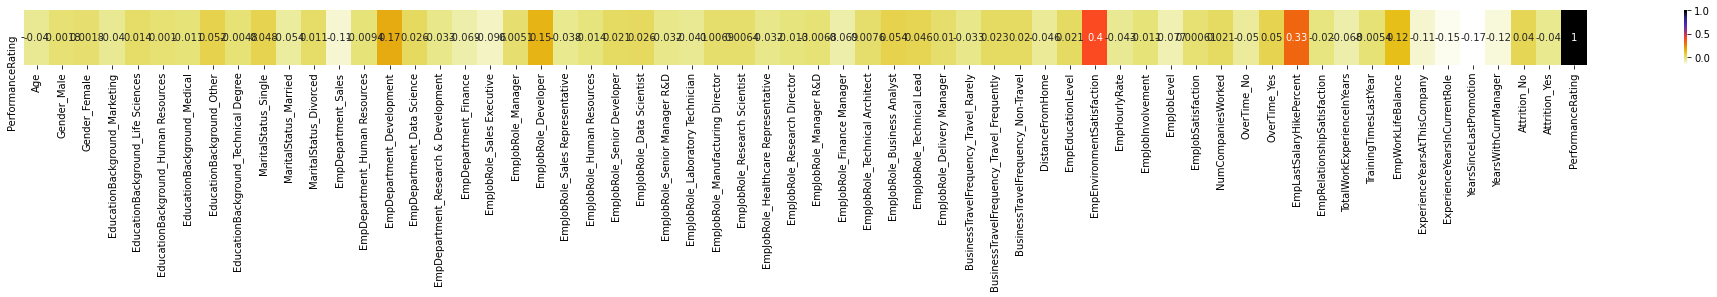

In [46]:
# Ckecking the correlation
plt.rcParams["figure.figsize"] = 35,1
correlation_depend = df_encoded.corr()
sns.heatmap(correlation_depend.loc[["PerformanceRating"],:],annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [47]:
## Variables with least correlation with depentant variable.
#taking cut off as 0.06
drop_col_names = []
for x,i in enumerate(correlation_depend["PerformanceRating"]):
    if abs(i) < 0.05:
        print(i,"   ",correlation_depend.columns[x])
        drop_col_names.append(correlation_depend.columns[x])

-0.0401641498872024     Age
-0.0017796819873021265     Gender_Male
0.001779681987302225     Gender_Female
-0.040023563219734465     EducationBackground_Marketing
0.014439401465547445     EducationBackground_Life Sciences
0.0010415460545998947     EducationBackground_Human Resources
-0.010884349869153548     EducationBackground_Medical
-0.004844495019035968     EducationBackground_Technical Degree
0.04767069689528068     MaritalStatus_Single
0.010982149845274325     MaritalStatus_Divorced
-0.009378260326356016     EmpDepartment_Human Resources
0.025519883128426023     EmpDepartment_Data Science
-0.032995795423510096     EmpDepartment_Research & Development
0.005057719330419306     EmpJobRole_Manager
-0.037511963999145234     EmpJobRole_Sales Representative
-0.01416588346298954     EmpJobRole_Human Resources
0.02120153345774564     EmpJobRole_Senior Developer
0.025519883128426023     EmpJobRole_Data Scientist
-0.03217742694415099     EmpJobRole_Senior Manager R&D
-0.04071116789349651    

In [48]:
## Droping those variables from the dataset
df_encoded=df_encoded.drop(columns=drop_col_names)
df_encoded.shape, df_encoded.columns

((1200, 21),
 Index(['EducationBackground_Other', 'MaritalStatus_Married',
        'EmpDepartment_Sales', 'EmpDepartment_Development',
        'EmpDepartment_Finance', 'EmpJobRole_Sales Executive',
        'EmpJobRole_Developer', 'EmpJobRole_Finance Manager',
        'EmpJobRole_Business Analyst', 'EmpEnvironmentSatisfaction',
        'EmpJobLevel', 'OverTime_No', 'OverTime_Yes',
        'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
        'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
        'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager', 'PerformanceRating'],
       dtype='object'))

#### b. Check correlation between independent variables

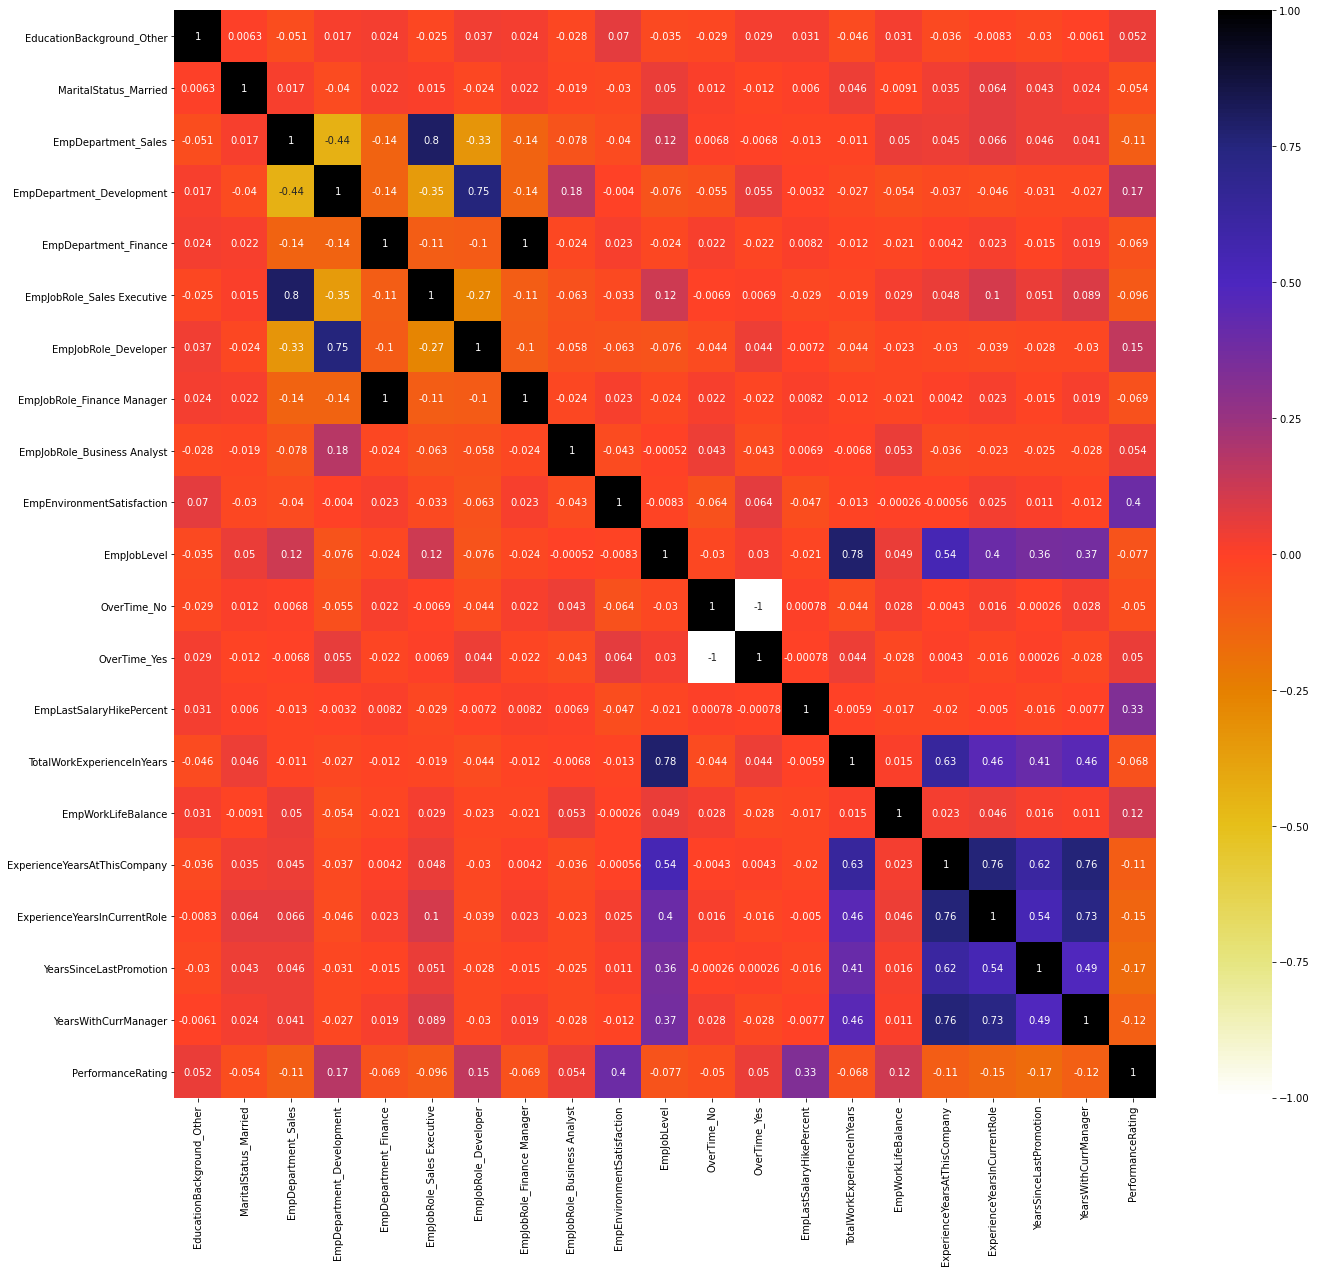

In [49]:
## Checking correlation between independent variables
## Variables with high correlation between independent variables will be removed later

plt.figure(figsize=(22,20))
cor=df_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [50]:
## Getting set of variables with high correlation.
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [55]:
# Correlated features
corr_features = correlation(df_encoded, 0.8)
print(len(set(corr_features)))
print(corr_features)

3
{'EmpJobRole_Finance Manager', 'OverTime_Yes', 'EmpJobRole_Sales Executive'}


In [56]:
## Dropping those features from the dataset..
df_encoded = df_encoded.drop(corr_features,axis=1)

In [74]:
## View Dataset after feature reduction
print(df_encoded.shape)
df_encoded.head(3)

(1200, 18)


,EducationBackground_Other,MaritalStatus_Married,EmpDepartment_Sales,EmpDepartment_Development,EmpDepartment_Finance,EmpJobRole_Developer,EmpJobRole_Business Analyst,EmpEnvironmentSatisfaction,EmpJobLevel,OverTime_No,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,2,1.0,12,10,2,10,7,0,8,3
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,2,1.0,12,20,3,7,7,1,7,3
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4,3,0.0,21,20,3,18,13,1,12,4


## 2. Mutual Information Gain

In [ ]:
### Tried to use Mutual Information gain method to select best features.
## This method was not suitable for the dataset.
## Accuracy decreased hence avoided this method.

## 3. PCA

In [ ]:
### Tried PCA method for feature selection but did not use it.
## This method reduced accuracy of the model.

#### Dropping variables having less impact on target variable.

In [76]:
### Based on the Analysis done previously (Data visualization), we knew that few variables do not have any impact on output.
### Dropping those variable from the dataset to get good accuracy.

df_processed= pd.DataFrame(df_encoded.drop(['EmpDepartment_Finance','MaritalStatus_Married','EmpJobRole_Business Analyst','EducationBackground_Other','OverTime_No','TotalWorkExperienceInYears','EmpJobRole_Developer',], axis=1))

In [80]:
## Saved New processed dataset in excel format

df_processed.to_excel('Employees_ProcessedDataset.xls',index=False)

# View of Processed Dataset
print(df_processed.shape)
df_processed.head()

(1200, 11)


,EmpDepartment_Sales,EmpDepartment_Development,EmpEnvironmentSatisfaction,EmpJobLevel,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,1.0,0.0,4,2,12,2,10,7,0,8,3
1,1.0,0.0,4,2,12,3,7,7,1,7,3
2,1.0,0.0,4,3,21,3,18,13,1,12,4
3,0.0,0.0,2,5,15,2,21,6,12,6,3
4,1.0,0.0,1,2,14,3,2,2,2,2,3


## Summary

- Dataset has been cleaned on the basis of model performance, Outliers could not be removed as it reduced the accuracy score.

- Suitable Feature Selection for this dataset was Correlation coeffient method, also tried other methods like Mutual Information Gain, PCA, Feature importance by xgboost and Randon forest but none of them were suitable for this dataset.

- New processed dataset has been created in excel format for further modeling and prediction.